# Snowpark Pythonを使ってみる
ここではsnowflakeが提供している下記のサンプルデータを利用する。 　

https://docs.snowflake.com/ja/user-guide/sample-data-tpch.html

In [1]:
import os
import sys
import seaborn as sns
from pathlib import Path
sys.path.append(os.path.dirname(Path().resolve()))

from modules.snowflake import Snowflake

In [2]:
snowflake = Snowflake()

In [3]:
customer_df = snowflake.fetch_dataframe('SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER')

In [4]:
type(customer_df)

snowflake.snowpark.table.Table

In [5]:
# explain()をすると実行されるstatementが確認できる
customer_df.explain()

---------DATAFRAME EXECUTION PLAN----------
Query List:
1.
SELECT  *  FROM (SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER)
Logical Execution Plan:
GlobalStats:
    partitionsTotal=3
    partitionsAssigned=3
    bytesAssigned=10747904
Operations:
1:0     ->Result  CUSTOMER.C_CUSTKEY, CUSTOMER.C_NAME, CUSTOMER.C_ADDRESS, CUSTOMER.C_NATIONKEY, CUSTOMER.C_PHONE, CUSTOMER.C_ACCTBAL, CUSTOMER.C_MKTSEGMENT, CUSTOMER.C_COMMENT  
1:1          ->TableScan  SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER  C_CUSTKEY, C_NAME, C_ADDRESS, C_NATIONKEY, C_PHONE, C_ACCTBAL, C_MKTSEGMENT, C_COMMENT  {partitionsTotal=3, partitionsAssigned=3, bytesAssigned=10747904}

--------------------------------------------


In [6]:
# to_pandas()とするとpandasのDataFrameとしてデータを取得できる
# このタイミングでSQLがコンパイルされsnowflakeでstatementが実行される
customer_pd = customer_df.to_pandas()

In [7]:
type(customer_pd)

pandas.core.frame.DataFrame

In [8]:
customer_pd.head(5)

,C_CUSTKEY,C_NAME,C_ADDRESS,C_NATIONKEY,C_PHONE,C_ACCTBAL,C_MKTSEGMENT,C_COMMENT
0,1,Customer#000000001,"IVhzIApeRb ot,c,E",15,25-989-741-2988,711.56,BUILDING,"to the even, regular platelets. regular, ironi..."
1,2,Customer#000000002,"XSTf4,NCwDVaWNe6tEgvwfmRchLXak",13,23-768-687-3665,121.65,AUTOMOBILE,l accounts. blithely ironic theodolites integr...
2,3,Customer#000000003,MG9kdTD2WBHm,1,11-719-748-3364,7498.12,AUTOMOBILE,"deposits eat slyly ironic, even instructions...."
3,4,Customer#000000004,XxVSJsLAGtn,4,14-128-190-5944,2866.83,MACHINERY,"requests. final, regular ideas sleep final accou"
4,5,Customer#000000005,KvpyuHCplrB84WgAiGV6sYpZq7Tj,3,13-750-942-6364,794.47,HOUSEHOLD,n accounts will have to unwind. foxes cajole a...


## select

In [9]:
from snowflake.snowpark.functions import col, lit

In [10]:
# カラム名の リネーム
rename_customer_df = customer_df.select(
    col('C_CUSTKEY').alias('ID'), # カラム C_CUSTKEY の値を ID として取得
    col('C_NAME').alias('NAME'), # カラム C_NAME の値を NAME として取得
    lit('C_CUSTKEY').alias('LITERAL') # 文字列 C_CUSTKEY を LITERALとして取得
)

In [11]:
rename_customer_df.explain()

---------DATAFRAME EXECUTION PLAN----------
Query List:
1.
SELECT "C_CUSTKEY" AS "ID", "C_NAME" AS "NAME", 'C_CUSTKEY' AS "LITERAL" FROM ( SELECT  *  FROM (SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER))
Logical Execution Plan:
GlobalStats:
    partitionsTotal=3
    partitionsAssigned=3
    bytesAssigned=10747904
Operations:
1:0     ->Result  CUSTOMER.C_CUSTKEY, CUSTOMER.C_NAME, 'C_CUSTKEY'  
1:1          ->TableScan  SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER  C_CUSTKEY, C_NAME  {partitionsTotal=3, partitionsAssigned=3, bytesAssigned=10747904}

--------------------------------------------


In [12]:
rename_customer_df.to_pandas().head(5)

,ID,NAME,LITERAL
0,1,Customer#000000001,C_CUSTKEY
1,2,Customer#000000002,C_CUSTKEY
2,3,Customer#000000003,C_CUSTKEY
3,4,Customer#000000004,C_CUSTKEY
4,5,Customer#000000005,C_CUSTKEY


## filter

In [13]:
filtered_customer_df = customer_df.filter(
    (col('C_NATIONKEY') == 24)
)

In [14]:
filtered_customer_df.explain()

---------DATAFRAME EXECUTION PLAN----------
Query List:
1.
SELECT  *  FROM ( SELECT  *  FROM (SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER)) WHERE ("C_NATIONKEY" = 24 :: INT)
Logical Execution Plan:
GlobalStats:
    partitionsTotal=3
    partitionsAssigned=3
    bytesAssigned=10747904
Operations:
1:0     ->Result  CUSTOMER.C_CUSTKEY, CUSTOMER.C_NAME, CUSTOMER.C_ADDRESS, CUSTOMER.C_NATIONKEY, CUSTOMER.C_PHONE, CUSTOMER.C_ACCTBAL, CUSTOMER.C_MKTSEGMENT, CUSTOMER.C_COMMENT  
1:1          ->Filter  CUSTOMER.C_NATIONKEY = 24  
1:2               ->TableScan  SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER  C_CUSTKEY, C_NAME, C_ADDRESS, C_NATIONKEY, C_PHONE, C_ACCTBAL, C_MKTSEGMENT, C_COMMENT  {partitionsTotal=3, partitionsAssigned=3, bytesAssigned=10747904}

--------------------------------------------


In [15]:
filtered_customer_df.to_pandas().head(5)

,C_CUSTKEY,C_NAME,C_ADDRESS,C_NATIONKEY,C_PHONE,C_ACCTBAL,C_MKTSEGMENT,C_COMMENT
0,117,Customer#000000117,"uNhM,PzsRA3S,5Y Ge5Npuhi",24,34-403-631-3505,3950.83,FURNITURE,affix. instructions are furiously sl
1,213,Customer#000000213,NpqMYBhBcWk8mnEta,24,34-768-700-9764,9987.71,HOUSEHOLD,al deposits. final instructions boost carefull...
2,339,Customer#000000339,jUs1Im28boIduGhp5vbKK50gM5ov7xH9G,24,34-992-529-2023,8438.07,HOUSEHOLD,"ix. ironic, special tithes detect dog"
3,365,Customer#000000365,QiZRz y1xU,24,34-708-696-5226,737.03,HOUSEHOLD,counts. unusual packages are blithely foxes. u...
4,386,Customer#000000386,DeQxsCxixT8RQ7JV6mddRYGDGQ2WM94,24,34-193-143-1425,232.01,BUILDING,counts. blithely permanent deposits wake slyly...


## group_by, agg, sort

In [16]:
from snowflake.snowpark.functions import count, count_distinct

In [17]:
grouped_customer_df = customer_df.group_by([
    col('C_NATIONKEY')
]).agg([
    count(col('C_NAME')).alias('NUM_NAMES'),
    count_distinct(col('C_MKTSEGMENT')).alias('DISTINCT_NUM_MKTSEGMENT')
]).sort(
    col('C_NATIONKEY').asc(),
    col('NUM_NAMES').desc()
)

In [18]:
grouped_customer_df.explain()

---------DATAFRAME EXECUTION PLAN----------
Query List:
1.
SELECT  *  FROM ( SELECT "C_NATIONKEY", count("C_NAME") AS "NUM_NAMES", count( DISTINCT "C_MKTSEGMENT") AS "DISTINCT_NUM_MKTSEGMENT" FROM ( SELECT  *  FROM (SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER)) GROUP BY "C_NATIONKEY") ORDER BY "C_NATIONKEY" ASC NULLS FIRST, "NUM_NAMES" DESC NULLS LAST
Logical Execution Plan:
GlobalStats:
    partitionsTotal=3
    partitionsAssigned=3
    bytesAssigned=10747904
Operations:
1:0     ->Result  CUSTOMER.C_NATIONKEY, COUNT(CUSTOMER.C_NAME), COUNT(DISTINCT CUSTOMER.C_MKTSEGMENT)  
1:1          ->Sort  CUSTOMER.C_NATIONKEY ASC NULLS FIRST, COUNT(CUSTOMER.C_NAME) DESC NULLS LAST  
1:2               ->Aggregate  aggExprs: [COUNT(CUSTOMER.C_NAME), COUNT(DISTINCT CUSTOMER.C_MKTSEGMENT)], groupKeys: [CUSTOMER.C_NATIONKEY]  
1:3                    ->TableScan  SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER  C_NAME, C_NATIONKEY, C_MKTSEGMENT  {partitionsTotal=3, partitionsAssigned=3, bytesAssigned=10747904}

--

In [19]:
grouped_customer_df.to_pandas().head(5)

,C_NATIONKEY,NUM_NAMES,DISTINCT_NUM_MKTSEGMENT
0,0,5925,5
1,1,5975,5
2,2,5999,5
3,3,6020,5
4,4,5995,5


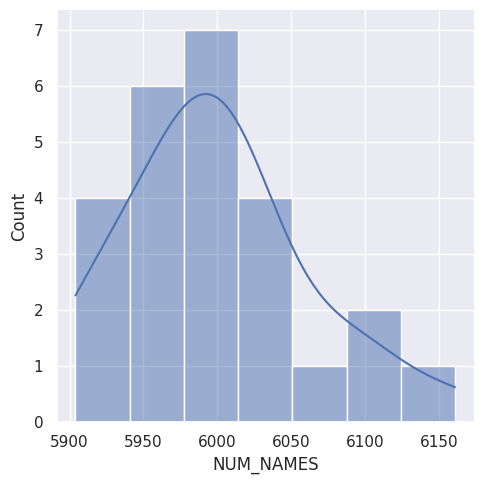

In [20]:
grouped_customer_pd = grouped_customer_df.to_pandas()
sns.set()
sns.displot(data=grouped_customer_pd, x='NUM_NAMES', kde=True)

## join

In [21]:
customer_df = snowflake.fetch_dataframe('SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER')
order_df = snowflake.fetch_dataframe('SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.ORDERS')

In [22]:
joined_order_df = order_df.join(
    customer_df,
    using_columns=(order_df.col('O_CUSTKEY') == customer_df.col('C_CUSTKEY')),
    join_type='right'
).select(
    customer_df.col('C_CUSTKEY').alias('CUSTOMER_ID'),
    customer_df.col('C_NAME').alias('CUSTOMER_NAME'),
    order_df.col('O_ORDERKEY').alias('ORDER_ID'),
    order_df.col('O_ORDERSTATUS').alias('STATUS'),
    order_df.col('O_TOTALPRICE').alias('TOTAL_PRICE')
)

In [23]:
joined_order_df.explain()

---------DATAFRAME EXECUTION PLAN----------
Query List:
1.
SELECT "C_CUSTKEY" AS "CUSTOMER_ID", "C_NAME" AS "CUSTOMER_NAME", "O_ORDERKEY" AS "ORDER_ID", "O_ORDERSTATUS" AS "STATUS", "O_TOTALPRICE" AS "TOTAL_PRICE" FROM ( SELECT  *  FROM (( SELECT "O_ORDERKEY" AS "O_ORDERKEY", "O_CUSTKEY" AS "O_CUSTKEY", "O_ORDERSTATUS" AS "O_ORDERSTATUS", "O_TOTALPRICE" AS "O_TOTALPRICE", "O_ORDERDATE" AS "O_ORDERDATE", "O_ORDERPRIORITY" AS "O_ORDERPRIORITY", "O_CLERK" AS "O_CLERK", "O_SHIPPRIORITY" AS "O_SHIPPRIORITY", "O_COMMENT" AS "O_COMMENT" FROM ( SELECT  *  FROM (SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.ORDERS))) AS SNOWPARK_TEMP_TABLE_FQ2NQZTSOH RIGHT OUTER JOIN ( SELECT "C_CUSTKEY" AS "C_CUSTKEY", "C_NAME" AS "C_NAME", "C_ADDRESS" AS "C_ADDRESS", "C_NATIONKEY" AS "C_NATIONKEY", "C_PHONE" AS "C_PHONE", "C_ACCTBAL" AS "C_ACCTBAL", "C_MKTSEGMENT" AS "C_MKTSEGMENT", "C_COMMENT" AS "C_COMMENT" FROM ( SELECT  *  FROM (SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.CUSTOMER))) AS SNOWPARK_TEMP_TABLE_9LPYGDRXEN ON ("O_CUSTKEY"

In [24]:
joined_order_df.to_pandas().head(5)

,CUSTOMER_ID,CUSTOMER_NAME,ORDER_ID,STATUS,TOTAL_PRICE
0,130357,Customer#000130357,2400032.0,F,49629.16
1,114808,Customer#000114808,2400068.0,O,309237.89
2,103156,Customer#000103156,2400069.0,F,294964.49
3,102937,Customer#000102937,2400096.0,O,124112.91
4,5780,Customer#000005780,2400167.0,O,246335.86


In [25]:
## left joinの例
customer_df.join(
    order_df,
    using_columns=(order_df.col('O_CUSTKEY') == customer_df.col('C_CUSTKEY')),
    join_type='left'
).select(
    customer_df.col('C_CUSTKEY').alias('CUSTOMER_ID'),
    customer_df.col('C_NAME').alias('CUSTOMER_NAME'),
    order_df.col('O_ORDERKEY').alias('ORDER_ID'),
    order_df.col('O_ORDERSTATUS').alias('STATUS'),
    order_df.col('O_TOTALPRICE').alias('TOTAL_PRICE')
).to_pandas().head(5)

,CUSTOMER_ID,CUSTOMER_NAME,ORDER_ID,STATUS,TOTAL_PRICE
0,15880,Customer#000015880,600032.0,O,28464.80
1,27106,Customer#000027106,600035.0,O,18579.92
2,107722,Customer#000107722,600037.0,F,43179.09
3,123593,Customer#000123593,600070.0,F,65124.59
4,23305,Customer#000023305,600071.0,F,174479.48


In [26]:
partsupp_df = snowflake.fetch_dataframe('SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.PARTSUPP')
lineitem_df = snowflake.fetch_dataframe('SNOWFLAKE_SAMPLE_DATA.TPCH_SF1.LINEITEM')

In [27]:
# 複数カラムでのjoinの例
partsupp_df.join(
    lineitem_df,
    using_columns=(
        (partsupp_df.col('PS_PARTKEY') == lineitem_df.col('L_PARTKEY'))
        & (partsupp_df.col('PS_SUPPKEY') == lineitem_df.col('L_SUPPKEY'))
    ),
    join_type='left'
).select(
    partsupp_df.col('PS_PARTKEY'),
    partsupp_df.col('PS_SUPPKEY'),
    lineitem_df.col('L_EXTENDEDPRICE')
).to_pandas().head(5)

,PS_PARTKEY,PS_SUPPKEY,L_EXTENDEDPRICE
0,182905,5424,15903.20
1,22671,5174,12749.36
2,62263,2264,39208.32
3,184497,4498,41118.74
4,44922,9931,14935.36
